# 1: Importing Superpowers of python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Function and Data Preparation

    y = wx + b
    y = 2x - 3

In [2]:
def datamaker(N, err):
    x = np.linspace(-1,1,N)

    y = 2*x - 3

    y = y + err*np.random.randn(N)

    return x , y

In [3]:
X_train, y_train = datamaker(500,0.2)
#X_train = X_train[:,np.newaxis]

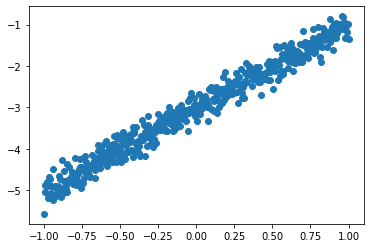

In [4]:
plt.scatter(X_train,y_train)

In [5]:
w_actual = 2
b_actual = -3

In [6]:
df = pd.DataFrame({'X_train':X_train, 'y_train': y_train})
df.head()

,X_train,y_train
0,-1.000000,-5.577881
1,-0.995992,-4.878032
2,-0.991984,-5.054653
3,-0.987976,-4.908925
4,-0.983968,-4.808613


In [7]:
X = np.array(df[['X_train']])
y = np.array(df[['y_train']])

In [8]:
X.shape

(500, 1)

In [9]:
y.shape

(500, 1)

## 3. Cost Function = That defines how bad our model prediction is compared to actual values

In [10]:
def costfunc(w,b,X,y):
    Z = np.dot(X,w) +b
    #Xshape = 500x1
    #W shape = 1x1
    #b shape = 1x1
    #Z shape = 500x1
    #y shape = 500x1
    loss = (y-Z)**2
    
    m = len(Z)
    
    j = ((1/m)*np.sum(loss))
    
    return j


# 4. Some Formulas for updating bias and constant term
## 1. $ J(w,b) = \frac {1}{m} \sum [y - (W.X + b)]^2 $
## 2. $ \frac {\partial J}{\partial W} = \frac {-2}{m} (X^T . [y - (W.X + b)]) $
## 3. $ \frac {\partial J} {\partial b} = \frac {-2}{m} \sum [ y - (W.X + b) ] $

In [11]:
def gradient(w,b,X,y):
    
    #dw = dJ/dw = Xt.(y-Z) = 1x500.500x1 = 1x1
    #db = dJ/db = 1x1
    
        
    #X - 500x1
    #y - 500x1
    #w - 1x1
    #b - 1x1
    
    Z = np.dot(X , w) + b
    
    J = costfunc(w,b,X,y)
    
    m = X.shape[0]
    
    dw = (-2/m)*np.dot(X.T , (y - Z))
    
    db = (-2/m)*np.sum(y - Z)
    
    return dw , db

In [12]:
#X.shape

#y.shape

In [13]:


#Just a check on how terrible our initial guess is performing.
w = np.random.randint(0,10)
b = np.random.randint(0,10)


print(w,b)
print(costfunc(w,b,X,y))

2 4
49.24057876605539


## 5. Lets make machine learn

In [14]:
def learning(w,b,X,y,iteration):
    
    #dw = dJ/dw = 1x1
    #db = dJ/db = 1x1
    
    #X - 500x1
    #y - 500x1
    #w - 1x1
    #b - 1x1
    
    Z = np.dot(X , w) + b
    
    costs = []
    
    costs.append(costfunc(w,b,X,y))
    
    for e in range(iteration):
        
        dw , db = gradient(w,b,X,y)
        
        w = w - 0.005*dw
        
        b = b - 0.005*db
        
        #if e%100 == 0:
        costs.append(costfunc(w,b,X,y))
        
    
    wf = w
    bf = b
    
    return wf , bf , costs

In [15]:


wf , bf , costs = learning(w,b,X,y,1000)



In [16]:
wf, bf

(array([[2.00745873]]), -3.0140155210881105)

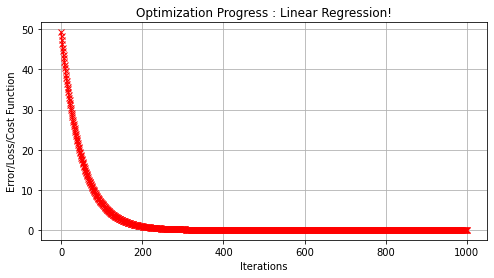

In [17]:
plt.figure(figsize = (8,4))
plt.style.use('default')
plt.plot(costs ,c='red' , marker='x')
plt.xlabel('Iterations')
plt.ylabel('Error/Loss/Cost Function')
plt.title('Optimization Progress : Linear Regression!')

plt.grid()

In [18]:
Actual = ['w = 2' , 'b = -3']

ModelResults = [f'w = {wf[0][0]}' , f'b = {bf}' ]

In [19]:
results = pd.DataFrame({'Actual Parameters':Actual , 'Model-Parameters':ModelResults})

In [20]:
results

,Actual Parameters,Model-Parameters
0,w = 2,w = 2.0074587325931157
1,b = -3,b = -3.0140155210881105


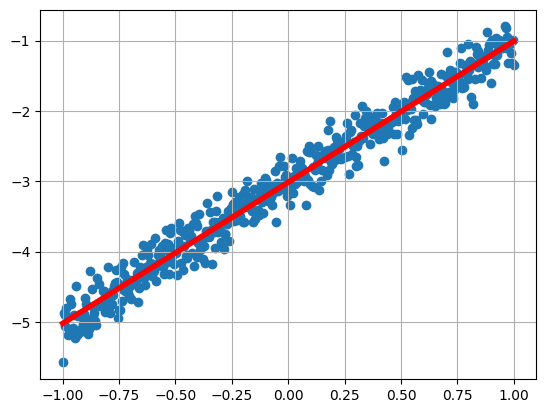

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train,wf[0][0]*X_train + bf, c = 'red',linewidth = 4 )
plt.grid()

## Making Prediction

In [22]:
xpre = int(input('Enter value for which you want predictions: '))
ypre = wf[0][0]*xpre + bf
yact = 2*xpre - 3
print("y_predicted is: "+ str(ypre) + '. Y_actual is: '+ str(yact))

Enter value for which you want predictions: 485
y_predicted is: 970.603469786573. Y_actual is: 967


In [285]:
"Thank You".center(40,'#')

'###############Thank You################'

# #########